# INFO40975 - Artificial Intelligence
# Final Project

Google Colab Notebook by **Tanishq Korada Ramkumar - 991493835**

Student ID ending with '5' - Classification

# **Version - 5 | Bank Marketing**

**Task - Classification**

**Target Value** - 'y' 
| Has the client subscribed to a term deposit?


In [1]:
#Installing Pip on google colab.
#Display interactive Visuals on Google Colab.

!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 288 kB 4.5 MB/s 
     |████████████████████████████████| 113 kB 43.3 MB/s 
     |████████████████████████████████| 167 kB 37.2 MB/s 
     |████████████████████████████████| 1.3 MB 30.9 MB/s 
     |████████████████████████████████| 2.0 MB 17.5 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 15.5 MB 391 kB/s 
     |████████████████████████████████| 6.8 MB 48.3 MB/s 
     |████████████████████████████████| 1.7 MB 12.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 64.4 MB/s 
     |████████████████████████████████| 10.1 MB 59.0 MB/s 
     |████████████████████████████████| 596 kB 67.0 MB/s 
     |████████████████████████████████| 303 kB 53.6 MB/s 
     |█████████████████

In [2]:
# Getting the Data from the link and Unzipping
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -q bank-additional.zip

#readind the data into this notebook.
import pandas as pd
df_bank = pd.read_csv('bank-additional/bank-additional.csv', sep=";")
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
#checking the shape of data
df_bank.shape

(4119, 21)

In [4]:
data = df_bank.sample(frac=0.9, random_state=786)
data_unseen = df_bank.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modelling: ' + str(data.shape))
print('Unseen Data for Predictions: ' + str(data_unseen.shape))

Data for Modelling: (3707, 21)
Unseen Data for Predictions: (412, 21)


In [5]:
#Setting up Environment in pyCaret

from pycaret.classification import *

exp_mclf101 = setup(data = data, target = 'y', session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(3707, 21)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
#Comaparing all Models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9140,0.9328,0.4687,0.6975,0.5582,0.5129,0.5266,0.673
lda,Linear Discriminant Analysis,0.9136,0.9342,0.5245,0.6707,0.5846,0.5375,0.5448,0.056
gbc,Gradient Boosting Classifier,0.9106,0.9398,0.5146,0.6512,0.5730,0.5239,0.5295,0.494
ridge,Ridge Classifier,0.9090,0.0000,0.3788,0.7047,0.4886,0.4443,0.4719,0.021
ada,Ada Boost Classifier,0.9067,0.9125,0.4581,0.6442,0.5317,0.4820,0.4926,0.206
rf,Random Forest Classifier,0.9036,0.9244,0.3763,0.6669,0.4762,0.4278,0.4515,0.620
lightgbm,Light Gradient Boosting Machine,0.9002,0.9283,0.4785,0.5985,0.5289,0.4740,0.4793,0.141
et,Extra Trees Classifier,0.8975,0.8995,0.3269,0.6198,0.4251,0.3750,0.3996,0.610
knn,K Neighbors Classifier,0.8921,0.8547,0.4684,0.5496,0.5025,0.4427,0.4463,0.137
dummy,Dummy Classifier,0.8832,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.018


In [7]:
#Creating a model
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8923,0.8810,0.4667,0.5385,0.5000,0.4400,0.4414
1,0.8885,0.8512,0.4516,0.5385,0.4912,0.4291,0.4312
2,0.8846,0.8800,0.5806,0.5143,0.5455,0.4797,0.4808
3,0.9115,0.8653,0.4516,0.7000,0.5490,0.5025,0.5174
4,0.8764,0.8286,0.4000,0.4615,0.4286,0.3597,0.3609
5,0.8996,0.8881,0.5333,0.5714,0.5517,0.4953,0.4957
6,0.9073,0.8732,0.5667,0.6071,0.5862,0.5341,0.5345
7,0.8919,0.7759,0.4000,0.5455,0.4615,0.4030,0.4090
8,0.8958,0.9055,0.4000,0.5714,0.4706,0.4148,0.4229
9,0.8726,0.7977,0.4333,0.4483,0.4407,0.3688,0.3689


In [8]:
#Tuning a Model
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors': np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8846,0.9207,0.3667,0.5000,0.4231,0.3607,0.3660
1,0.8923,0.9021,0.3548,0.5789,0.4400,0.3842,0.3983
2,0.9000,0.9303,0.6129,0.5758,0.5938,0.5368,0.5371
3,0.9231,0.9320,0.4839,0.7895,0.6000,0.5601,0.5807
4,0.8996,0.9098,0.4000,0.6000,0.4800,0.4269,0.4377
5,0.9035,0.8934,0.4333,0.6190,0.5098,0.4581,0.4671
6,0.9382,0.9260,0.6000,0.8182,0.6923,0.6589,0.6687
7,0.9112,0.8792,0.5000,0.6522,0.5660,0.5175,0.5232
8,0.8919,0.9433,0.3333,0.5556,0.4167,0.3612,0.3755
9,0.9228,0.8974,0.5333,0.7273,0.6154,0.5736,0.5821


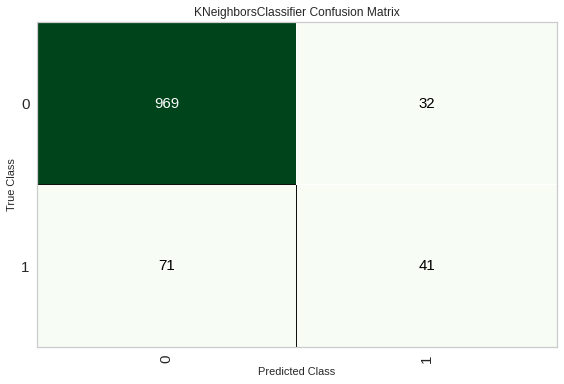

In [9]:
#plotting a model
plot_model(tuned_knn, plot = 'confusion_matrix')

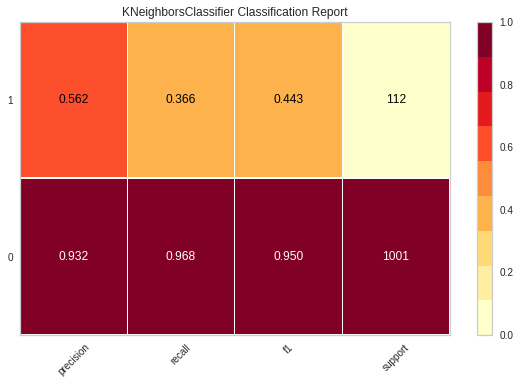

In [10]:
#Classification Report
plot_model(tuned_knn, plot = 'class_report')

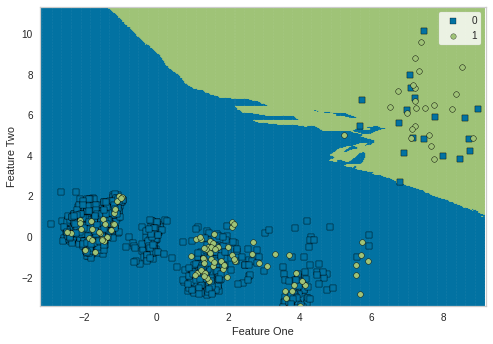

In [11]:
#Decision Boundary Plot
plot_model(tuned_knn, plot='boundary')

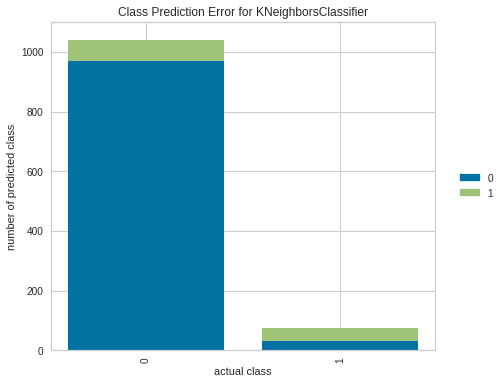

In [12]:
#Predicting Error Plot
plot_model(tuned_knn, plot = 'error')

In [13]:
#Analyzing the performance of the model through various functions.
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
#Predicting on test/hold-out sample
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9075,0.9063,0.3661,0.5616,0.4432,0.3952,0.406


The accuracy on test/hold-out set is 0.9075 compared to 0.9067 achieved on tuned_knn CV results in tuning the KNN. 

In [15]:
#Finalizing model for Deployment
final_knn = finalize_model(tuned_knn)

In [16]:
#Final K Nearest Neighbor parameters for deployment
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=45, p=2,
                     weights='uniform')


In [17]:
#Predicting on Unseen Data

unseen_predictions = predict_model(final_knn, data = data_unseen)
unseen_predictions

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,no,0.8000
1,36,self-employed,single,basic.4y,no,no,no,cellular,jul,thu,148,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,no,1.0000
2,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,thu,211,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no,no,1.0000
3,46,admin.,divorced,university.degree,no,yes,no,telephone,jul,mon,59,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,no,1.0000
4,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,38,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,no,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,55,management,divorced,university.degree,unknown,no,no,cellular,nov,fri,89,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no,no,0.9778
408,46,admin.,married,university.degree,no,no,no,cellular,nov,thu,358,1,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no,no,1.0000
409,42,technician,single,university.degree,no,yes,no,cellular,aug,tue,578,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,no,0.8667
410,35,entrepreneur,single,university.degree,no,yes,no,cellular,jul,mon,88,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,no,1.0000


In [18]:
#Saving the model
save_model(final_knn, 'Final KNN Model 13Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('fix_perfect', Remove_100(target='y')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
              

In [19]:
#Loading the saved Model
saved_final_knn = load_model('Final KNN Model 13Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [20]:
#Predicting new data using same data used in saved file

new_prediction = predict_model(saved_final_knn, data=data_unseen)
new_prediction

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,no,0.8000
1,36,self-employed,single,basic.4y,no,no,no,cellular,jul,thu,148,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,no,1.0000
2,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,thu,211,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no,no,1.0000
3,46,admin.,divorced,university.degree,no,yes,no,telephone,jul,mon,59,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,no,1.0000
4,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,38,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,no,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,55,management,divorced,university.degree,unknown,no,no,cellular,nov,fri,89,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no,no,0.9778
408,46,admin.,married,university.degree,no,no,no,cellular,nov,thu,358,1,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no,no,1.0000
409,42,technician,single,university.degree,no,yes,no,cellular,aug,tue,578,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,no,0.8667
410,35,entrepreneur,single,university.degree,no,yes,no,cellular,jul,mon,88,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,no,1.0000
